In [ ]:
#@markdown Before running this notebook please upload your Blender file to your Google drive and create a separate folder to save Render frames.
#@markdown Then check whether the runtime is set to GPU or not by 

#@markdown Runtime > Change Runtime Type > GPU

In [ ]:
#check Disk
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

In [ ]:
#check GPU
! nvidia-smi

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
#Connect Folder Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#@title Select Blender Version (used for rendering) then execute the cell{ display-mode: "form" }
Blender_Version = 'Blender 3.0' #@param ["Blender 2.79b", "Blender 2.80", "Blender 2.81", "Blender 2.82a", "Blender 2.83.0", "Blender 2.83.3", "Blender 2.90alpha (expiremental)", "Blender 2.90", "Blender 2.91", "Blender 2.92", "Blender 2.93", "Blender 3.0", "Blender 3.1"]

def path_leaf(path):
  import ntpath
  head, tail = ntpath.split(path)
  return tail or ntpath.basename(head)

dl_link = {
    "Blender 2.79b": "https://download.blender.org/release/Blender2.79/blender-2.79b-linux-glibc219-x86_64.tar.bz2",
    "Blender 2.80": "https://download.blender.org/release/Blender2.80/blender-2.80-linux-glibc217-x86_64.tar.bz2",
    "Blender 2.81": "https://download.blender.org/release/Blender2.81/blender-2.81-linux-glibc217-x86_64.tar.bz2",
    "Blender 2.82a": "https://download.blender.org/release/Blender2.82/blender-2.82a-linux64.tar.xz",
    "Blender 2.83.0": "https://download.blender.org/release/Blender2.83/blender-2.83.0-linux64.tar.xz",
    "Blender 2.83.3": "https://download.blender.org/release/Blender2.83/blender-2.83.3-linux64.tar.xz",
    "Blender 2.90alpha (expiremental)": "https://blender.community/5edccfe69c122126f183e2ad/download/5ef635439c12214ca244be6b",
    "Blender 2.90" : "https://download.blender.org/release/Blender2.90/blender-2.90.0-linux64.tar.xz",
    "Blender 2.91" : "https://download.blender.org/release/Blender2.91/blender-2.91.0-linux64.tar.xz",
    "Blender 2.92" : "https://download.blender.org/release/Blender2.92/blender-2.92.0-linux64.tar.xz",
    "Blender 2.93" : "https://download.blender.org/release/Blender2.93/blender-2.93.1-linux-x64.tar.xz",
    "Blender 3.0" : "https://download.blender.org/release/Blender3.0/blender-3.0.0-linux-x64.tar.xz",
    "Blender 3.1" : "https://download.blender.org/release/Blender3.1/blender-3.1.0-linux-x64.tar.xz"
}


dl = dl_link[Blender_Version]
filename = path_leaf(dl)

if (Blender_Version == "Blender 2.90alpha (expiremental)"):
  !wget $dl
  !sudo apt-get install p7zip-full
  !7z x $filename
  !mv blender_290bM_e935447a5370-20200625-1857 blender



else:
  !wget -nc $dl
  !mkdir ./blender && tar xf $filename -C ./blender --strip-components 1



!apt install libboost-all-dev
!apt install libgl1-mesa-dev
!apt install libglu1-mesa libsm-dev
!sudo apt install libgl1-mesa-glx libxi6 libxrender1


data = "import re\n"+\
    "import bpy\n"+\
    "scene = bpy.context.scene\n"+\
    "scene.cycles.device = 'GPU'\n"+\
    "prefs = bpy.context.preferences\n"+\
    "prefs.addons['cycles'].preferences.get_devices()\n"+\
    "cprefs = prefs.addons['cycles'].preferences\n"+\
    "print(cprefs)\n"+\
    "# Attempt to set GPU device types if available\n"+\
    "for compute_device_type in ('CUDA', 'OPENCL', 'NONE'):\n"+\
    "    try:\n"+\
    "        cprefs.compute_device_type = compute_device_type\n"+\
    "        print('Device found',compute_device_type)\n"+\
    "        break\n"+\
    "    except TypeError:\n"+\
    "        pass\n"+\
    "# Enable all CPU and GPU devices\n"+\
    "for device in cprefs.devices:\n"+\
    "    if not re.match('intel', device.name, re.I):\n"+\
    "        print('Activating',device)\n"+\
    "        device.use = True\n"
with open('setgpu.py', 'w') as f:
    f.write(data)

#if you want to use Optix

 Select Optix from Blender peference menu in you computer which you created the project and save the preferences. Then upload the project. No need of keeping optix as default in you working machine. Restore it to you prefered cycles device after uploading the file to google drive. Even if you don't have a GPU or cycles device is selected as none change it to your prefered engine as CUDA or Optix and save the preferences, coz after the settings are baked into the file the colab instance gonna use your settings.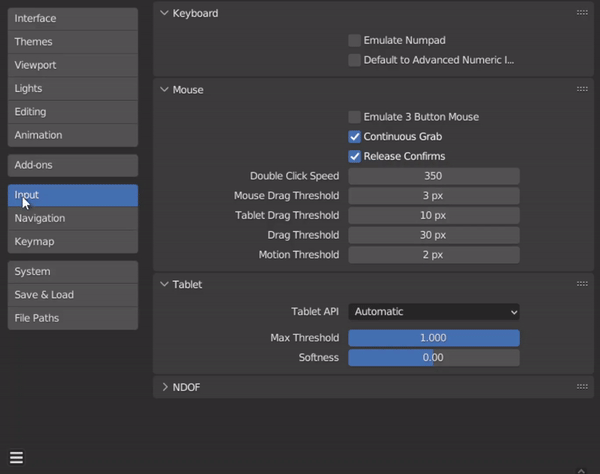

# if you don't have a GPU
If you don't have a GPU in the machine you used to create blender scene, no matter you can use colab. You need to change your cycle device from none to any other except HIP. You use either CUDA or Optix. Select your prefered one and save the peferences. After that make sure that you saved you file again after you saved the preferences. Then upload your file you Gdrive. After you upload the file you can change the cycles device back to none.

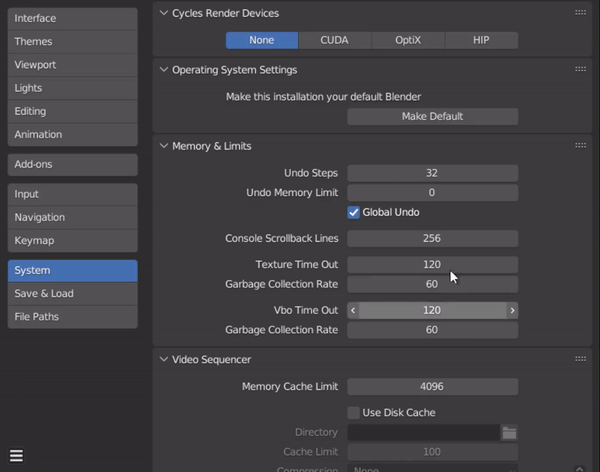

# **Render Single Frame**

In [ ]:
#Rendering Still Frame CUDA ( Compatible with Any )
! ./blender/blender -P setgpu.py -b '/content/drive/MyDrive/classroom.blend' -o '/content/drive/MyDrive/Render/frame_####.png' -f 50 --cycles-device CUDA

In [ ]:
#Rendering Still Frame OPTIX only for Tesla T4 ( Faster than default CUDA)
! ./blender/blender -P setgpu.py -b '/content/drive/MyDrive/classroom.blend' -o '/content/drive/MyDrive/Render/frame_####.png' -f 10 --cycles-device OPTIX

# **Render Animation**

In [ ]:
#Rendering Animation CUDA ( Compatible with Any)
! ./blender/blender -P setgpu.py -b '/content/drive/MyDrive/classroom.blend' -o '/content/drive/MyDrive/Render/frame_####.png' -s 1 -e 150 -a --cycles-device CUDA

In [ ]:
#Rendering Animation OPTIX only for Tesla T4 ( Faster than default CUDA)
! ./blender/blender -P setgpu.py -b '/content/drive/MyDrive/classroom.blend' -o '/content/drive/MyDrive/Render/frame_####.png' -s 51 -e 150 -a --cycles-device OPTIX

# ***Error Resolving***

if this error comes, run the following code

```
# src/tcmalloc.cc:283] Attempt to free invalid pointer 0x7ff442c2b000 
```



In [ ]:
 #DELETE ERROR
import os

os.environ["LD_PRELOAD"] = ""

#Deletes wrong Version of libtcmalloc-minimal4
!apt remove libtcmalloc-minimal4
#Installs correct version of libtcmalloc-minimal4
!apt install libtcmalloc-minimal4

#Adds this library to the user environment
os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0"